# Deadly Visualizations!!!

![Image](../images/viz_types_portada.png)

## Setup

First we need to create a basic setup which includes:

- Importing the libraries.

- Reading the dataset file (source [Instituto Nacional de Estadística](https://www.ine.es/ss/Satellite?L=es_ES&c=Page&cid=1259942408928&p=1259942408928&pagename=ProductosYServicios%2FPYSLayout)).

- Create a couple of columns and tables for the analysis.

__NOTE:__ some functions were already created in order to help you go through the challenge. However, feel free to perform any code you might need.

In [8]:
# imports

import sys
import re
sys.path.insert(0, "../modules")

import numpy as np
import pandas as pd

import plotly.express as px
import cufflinks as cf
cf.go_offline()
import seaborn as sns

import module as mod     # functions are include in module.py

In [4]:
# read dataset

deaths = pd.read_csv('../data/7947.csv', sep=';', thousands='.')

deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301158 entries, 0 to 301157
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Causa de muerte  301158 non-null  object
 1   Sexo             301158 non-null  object
 2   Edad             301158 non-null  object
 3   Periodo          301158 non-null  int64 
 4   Total            301158 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


In [5]:
# add some columns...you'll need them later

deaths['cause_code'] = deaths['Causa de muerte'].apply(mod.cause_code)
deaths['cause_group'] = deaths['Causa de muerte'].apply(mod.cause_types)
deaths['cause_name'] = deaths['Causa de muerte'].apply(mod.cause_name)

deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301158 entries, 0 to 301157
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Causa de muerte  301158 non-null  object
 1   Sexo             301158 non-null  object
 2   Edad             301158 non-null  object
 3   Periodo          301158 non-null  int64 
 4   Total            301158 non-null  int64 
 5   cause_code       301158 non-null  object
 6   cause_group      301158 non-null  object
 7   cause_name       301158 non-null  object
dtypes: int64(2), object(6)
memory usage: 18.4+ MB


In [6]:
# lets check the categorical variables

var_list = ['Sexo', 'Edad', 'Periodo', 'cause_code', 'cause_name', 'cause_group']

categories = mod.cat_var(deaths, var_list)
categories

,categorical_variable,number_of_possible_values,values
0,cause_code,117,"[001-102, 001-008, 001, 002, 003, 004, 005, 00..."
1,cause_name,117,"[I-XXII.Todas las causas, I.Enfermedades infec..."
2,Periodo,39,"[2018, 2017, 2016, 2015, 2014, 2013, 2012, 201..."
3,Edad,22,"[Todas las edades, Menos de 1 año, De 1 a 4 añ..."
4,Sexo,3,"[Total, Hombres, Mujeres]"
5,cause_group,2,"[Multiple causes, Single cause]"


In [7]:
# we need also to create a causes table for the analysis

causes_table = deaths[['cause_code', 'cause_name']].drop_duplicates().sort_values(by='cause_code').reset_index(drop=True)

causes_table

,cause_code,cause_name
0,001,Enfermedades infecciosas intestinales
1,001-008,I.Enfermedades infecciosas y parasitarias
2,001-102,I-XXII.Todas las causas
3,002,Tuberculosis y sus efectos tardíos
4,003,Enfermedad meningocócica
...,...,...
112,098,Suicidio y lesiones autoinfligidas
113,099,Agresiones (homicidio)
114,100,Eventos de intención no determinada
115,101,Complicaciones de la atención médica y quirúrgica


In [9]:
# And some space for free-style Pandas!!! (e.g.: df['column_name'].unique())


deaths







,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721,001-102,Multiple causes,I-XXII.Todas las causas
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523,001-102,Multiple causes,I-XXII.Todas las causas
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611,001-102,Multiple causes,I-XXII.Todas las causas
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568,001-102,Multiple causes,I-XXII.Todas las causas
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2014,395830,001-102,Multiple causes,I-XXII.Todas las causas
...,...,...,...,...,...,...,...,...
301153,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1984,0,102,Single cause,Otras causas externas y sus efectos tardíos
301154,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1983,0,102,Single cause,Otras causas externas y sus efectos tardíos
301155,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1982,0,102,Single cause,Otras causas externas y sus efectos tardíos
301156,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1981,0,102,Single cause,Otras causas externas y sus efectos tardíos


## Lets make some transformations

Eventhough the dataset is pretty clean, the information is completely denormalized as you could see. For that matter a collection of methods (functions) are available in order to generate the tables you might need:

- `row_filter(df, cat_var, cat_values)` => Filter rows by any value or group of values in a categorical variable.

- `nrow_filter(df, cat_var, cat_values)` => The same but backwards. 

- `groupby_sum(df, group_vars, agg_var='Total', sort_var='Total')` => Add deaths by a certain variable.

- `pivot_table(df, col, x_axis, value='Total')`=> Make some pivot tables, you might need them...

__NOTE:__ be aware that the filtering methods can perform a filter at a time. Feel free to perform the filter you need in any way you want or feel confortable with.

In [ ]:
# Example 1
'''
dataset = mod.row_filter(deaths, 'Sexo', ['Total'])
dataset = mod.row_filter(dataset, 'Edad', ['Todas las edades'])
dataset.head()
'''

In [ ]:
# Example 2
'''
group = ['cause_code','Periodo']
dataset = mod.groupby_sum(deaths, group)
dataset.head()
'''

In [ ]:
# Example 3
'''
dataset = mod.pivot_table(dataset, 'cause_code', 'Periodo')
dataset.head()
'''

In [29]:
deaths['Causa de muerte'].unique()

array(['001-102  I-XXII.Todas las causas',
       '001-008  I.Enfermedades infecciosas y parasitarias',
       '001  Enfermedades infecciosas intestinales',
       '002  Tuberculosis y sus efectos tardíos',
       '003  Enfermedad meningocócica', '004  Septicemia',
       '005  Hepatitis vírica', '006  SIDA',
       '007  VIH+ (portador, evidencias de laboratorio del VIH, ...)',
       '008  Resto de enfermedades infecciosas y parasitarias y sus efectos tardíos',
       '009-041  II.Tumores',
       '009  Tumor maligno del labio, de la cavidad bucal y de la faringe',
       '010  Tumor maligno del esófago',
       '011  Tumor maligno del estómago', '012  Tumor maligno del colon',
       '013  Tumor maligno del recto, de la porción rectosigmoide y del ano',
       '014  Tumor maligno del hígado y vías biliares intrahepáticas',
       '015  Tumor maligno del páncreas',
       '016  Otros tumores malignos digestivos',
       '017  Tumor maligno de la laringe',
       '018  Tumor maligno d

In [ ]:
deaths[]

In [18]:
deaths

,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721,001-102,Multiple causes,I-XXII.Todas las causas
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523,001-102,Multiple causes,I-XXII.Todas las causas
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611,001-102,Multiple causes,I-XXII.Todas las causas
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568,001-102,Multiple causes,I-XXII.Todas las causas
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2014,395830,001-102,Multiple causes,I-XXII.Todas las causas
...,...,...,...,...,...,...,...,...
301153,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1984,0,102,Single cause,Otras causas externas y sus efectos tardíos
301154,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1983,0,102,Single cause,Otras causas externas y sus efectos tardíos
301155,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1982,0,102,Single cause,Otras causas externas y sus efectos tardíos
301156,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1981,0,102,Single cause,Otras causas externas y sus efectos tardíos


In [30]:
melanomas = mod.row_filter(deaths, 'Causa de muerte', ['021  Melanoma maligno de la piel'])
melanomas


,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,021 Melanoma maligno de la piel,Total,Todas las edades,2015,1080,021,Single cause,Melanoma maligno de la piel
1,021 Melanoma maligno de la piel,Total,Todas las edades,2014,1059,021,Single cause,Melanoma maligno de la piel
2,021 Melanoma maligno de la piel,Total,Todas las edades,2017,992,021,Single cause,Melanoma maligno de la piel
3,021 Melanoma maligno de la piel,Total,Todas las edades,2013,987,021,Single cause,Melanoma maligno de la piel
4,021 Melanoma maligno de la piel,Total,Todas las edades,2018,982,021,Single cause,Melanoma maligno de la piel
...,...,...,...,...,...,...,...,...
2569,021 Melanoma maligno de la piel,Mujeres,De 5 a 9 años,2002,0,021,Single cause,Melanoma maligno de la piel
2570,021 Melanoma maligno de la piel,Mujeres,De 5 a 9 años,2001,0,021,Single cause,Melanoma maligno de la piel
2571,021 Melanoma maligno de la piel,Mujeres,De 5 a 9 años,1999,0,021,Single cause,Melanoma maligno de la piel
2572,021 Melanoma maligno de la piel,Mujeres,De 5 a 9 años,1998,0,021,Single cause,Melanoma maligno de la piel


In [33]:
melanomas1 = mod.row_filter(melanomas, 'Edad', ['Todas las edades'])
melanomas1

,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,021 Melanoma maligno de la piel,Total,Todas las edades,2015,1080,021,Single cause,Melanoma maligno de la piel
1,021 Melanoma maligno de la piel,Total,Todas las edades,2014,1059,021,Single cause,Melanoma maligno de la piel
2,021 Melanoma maligno de la piel,Total,Todas las edades,2017,992,021,Single cause,Melanoma maligno de la piel
3,021 Melanoma maligno de la piel,Total,Todas las edades,2013,987,021,Single cause,Melanoma maligno de la piel
4,021 Melanoma maligno de la piel,Total,Todas las edades,2018,982,021,Single cause,Melanoma maligno de la piel
...,...,...,...,...,...,...,...,...
112,021 Melanoma maligno de la piel,Mujeres,Todas las edades,1981,98,021,Single cause,Melanoma maligno de la piel
113,021 Melanoma maligno de la piel,Hombres,Todas las edades,1981,96,021,Single cause,Melanoma maligno de la piel
114,021 Melanoma maligno de la piel,Mujeres,Todas las edades,1980,95,021,Single cause,Melanoma maligno de la piel
115,021 Melanoma maligno de la piel,Mujeres,Todas las edades,1982,87,021,Single cause,Melanoma maligno de la piel


In [37]:
melanomas2 = mod.nrow_filter(melanomas1, 'Sexo', ['Total'])
melanomas2.sort_values('Periodo').head(20)

,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
77,021 Melanoma maligno de la piel,Hombres,Todas las edades,1980,86,021,Single cause,Melanoma maligno de la piel
75,021 Melanoma maligno de la piel,Mujeres,Todas las edades,1980,95,021,Single cause,Melanoma maligno de la piel
74,021 Melanoma maligno de la piel,Hombres,Todas las edades,1981,96,021,Single cause,Melanoma maligno de la piel
73,021 Melanoma maligno de la piel,Mujeres,Todas las edades,1981,98,021,Single cause,Melanoma maligno de la piel
76,021 Melanoma maligno de la piel,Mujeres,Todas las edades,1982,87,021,Single cause,Melanoma maligno de la piel
72,021 Melanoma maligno de la piel,Hombres,Todas las edades,1982,107,021,Single cause,Melanoma maligno de la piel
70,021 Melanoma maligno de la piel,Mujeres,Todas las edades,1983,129,021,Single cause,Melanoma maligno de la piel
69,021 Melanoma maligno de la piel,Hombres,Todas las edades,1983,137,021,Single cause,Melanoma maligno de la piel
68,021 Melanoma maligno de la piel,Hombres,Todas las edades,1984,154,021,Single cause,Melanoma maligno de la piel
66,021 Melanoma maligno de la piel,Mujeres,Todas las edades,1984,158,021,Single cause,Melanoma maligno de la piel


In [45]:

px.bar(melanomas2, x='Periodo', y="Total", color='Sexo', barmode="group", title="Melanomas")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Sexo=Hombres<br>Periodo=%{x}<br>Total=%{y}<extra></extra>',
              'legendgroup': 'Hombres',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Hombres',
              'offsetgroup': 'Hombres',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([2014, 2013, 2015, 2017, 2018, 2010, 2012, 2016, 2011, 2008, 2009, 2005,
                          2007, 2004, 2002, 2003, 1998, 2006, 2000, 2001, 1999, 1996, 1995, 1997,
                          1994, 1992, 1990, 1993, 1991, 1989, 1988, 1987, 1985, 1986, 1984, 1983,
                          1982, 1981, 1980]),
              'xaxis': 'x',
              'y': array([599, 581, 577, 566, 551, 551, 540, 537, 523, 510, 480, 478, 471, 424,
                          410, 409, 407, 406, 391, 391, 371, 358, 350, 312, 298, 294, 265, 263,
                          258, 233, 219, 205, 180, 177, 154, 137, 107,  96,  86]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Sexo=Mujeres<br>Periodo=%{x}<br>Total=%{y}<extra></extra>',
              'legendgroup': 'Mujeres',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'Mujeres',
              'offsetgroup': 'Mujeres',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([2015, 2014, 2018, 2006, 2017, 2010, 2016, 2013, 2011, 2012, 2009, 2007,
                          2008, 2005, 2003, 2001, 2004, 2002, 1998, 1999, 2000, 1997, 1994, 1995,
                          1996, 1993, 1992, 1989, 1991, 1990, 1988, 1987, 1984, 1986, 1983, 1985,
                          1981, 1980, 1982]),
              'xaxis': 'x',
              'y': array([503, 460, 431, 428, 426, 424, 422, 406, 404, 396, 384, 379, 367, 362,
                          355, 351, 337, 333, 332, 315, 310, 297, 289, 289, 283, 257, 244, 231,
                          226, 203, 168, 163, 158, 158, 129, 129,  98,  95,  87]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'group',
               'legend': {'title': {'text': 'Sexo'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Melanomas'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Periodo'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Total'}}}
})

<Axes: xlabel='Periodo', ylabel='Total'>

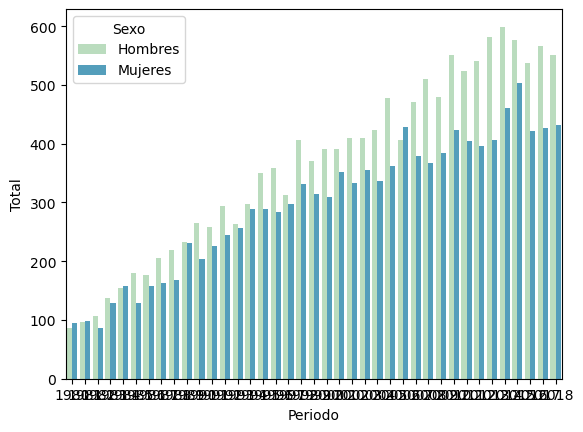

In [42]:
sns.barplot(x='Periodo', y="Total", hue='Sexo', data=melanomas2, palette="GnBu")

## ...and finally, show me some insights with Plotly!!!

In [ ]:
# Cufflinks histogram
'''
dataset_column.iplot(kind='hist',
                     title='VIZ TITLE',
                     yTitle='AXIS TITLE',
                     xTitle='AXIS TITLE')
'''

In [ ]:
# Cufflinks bar plot
'''
dataset_bar.iplot(kind='bar',
                  x='VARIABLE',
                  xTitle='AXIS TITLE',
                  yTitle='AXIS TITLE',
                  title='VIZ TITLE')
'''

In [ ]:
# Cufflinks line plot
'''
dataset_line.iplot(kind='line',
                   x='VARIABLE',
                   xTitle='AXIS TITLE',
                   yTitle='AXIS TITLE',
                   title='VIZ TITLE')
'''

In [ ]:
# Cufflinks scatter plot
'''
dataset_scatter.iplot(x='VARIABLE', 
                      y='VARIABLE', 
                      categories='VARIABLE',
                      xTitle='AXIS TITLE', 
                      yTitle='AXIS TITLE',
                      title='VIZ TITLE')
'''